1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson as pois
from scipy import stats
import pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize


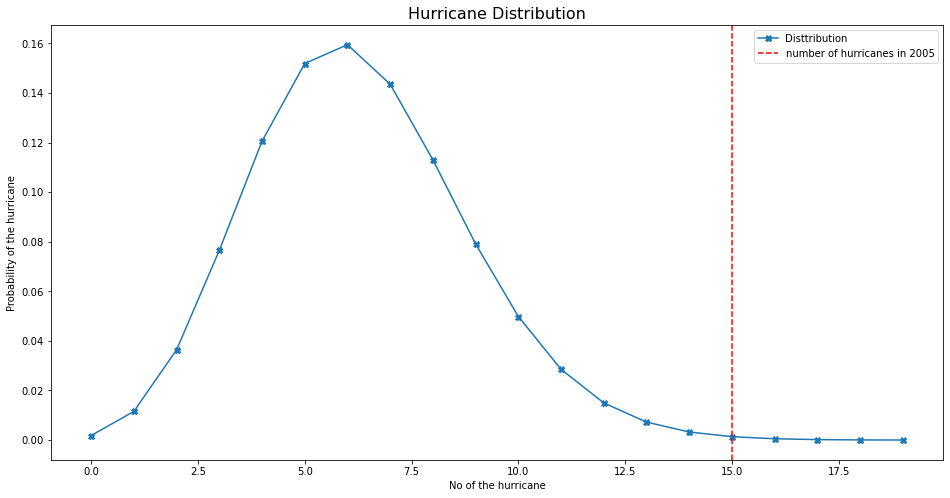

In [2]:
#Number of hurricanes in 2005
numberofHurricanes = 15

#Historic average of the number of hurricanes
#Historice average denoted the mean value
historicAverage = 6.3

#Random number for the hurricanes that are more than 15
#Question denotes that the calculation of probability that in a single year are observed 15 or more hurricanes
#Hence lets define there will be 20 hurricanes which is greater than 15
randomNumberofHurricanes = 20

#Assumption is that the number of hurricanes are random that follows the Poission distrubtion
xValues = np.arange(randomNumberofHurricanes)
yValues = stats.poisson.pmf(xValues, historicAverage)

#Lets plot what we have obtained
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(xValues, yValues, label = "Disttribution",marker='X')
plt.title("Hurricane Distribution", size = 16)
plt.xlabel("No of the hurricane")
plt.ylabel("Probability of the hurricane")
plt.axvline(numberofHurricanes, label = 'number of hurricanes in 2005', color = 'red', ls = '--')
plt.legend()
plt.show()

In [3]:
#The significance level is the level of probability of rejecting the null hyphothesis when it is true
#For instance, 0.05 significance level indicates a 5% risk of concluding that a difference exists when there is no actula difference
#In order to apply Z-test we are using 0.05 significance level
#And since the values are poisson distrubuted standard deviation value is the square root of the mean


#Finding the rejection point according to the distrubution
significanceLevel = 0.05
rejectionPoint = xValues[yValues.cumsum() < 1 - significanceLevel][-1] + 1
print("Rejection starts at: ", rejectionPoint,"\n")

#Finding the p-value of the null hyphothesis
pValueNullHyphothesis = 1 - stats.poisson.cdf(numberofHurricanes, historicAverage)
print("P-value of the Null Hyphothesis:", pValueNullHyphothesis)
#Probability of having 15 hurricanes in year 2005 have low probability
#Distance of the average value between the expected average value is too high

#Choosing whether we reject or accept null hyphothesis
#The key point is to define and calculate the test statistics in order to reject or not reject the null hyphothesis
#The p-value that we obtain from the null hyphothesis is smaller than the significance level


#Applying the Z-test
standarDeviation = np.sqrt(historicAverage)
ZScore = abs(numberofHurricanes - historicAverage) / standarDeviation
print("Z score that we obtained :", ZScore,"\n")

#Calculating the new probability value
newProbability = stats.norm.cdf(-ZScore) + (1-stats.norm.cdf(ZScore))
print("New probability with Z score: ", newProbability)
#New probability is too low.
#Hence we are rejecting the null hyphothesis

Rejection starts at:  11 

P-value of the Null Hyphothesis: 0.0008444930803583883
Z score that we obtained : 3.4661629670697414 

New probability with Z score:  0.0005279431738299246


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Number of samples that are taken from the individuals are not overlapping with the expectation!

Obtained T-value : -3.786997938137629 



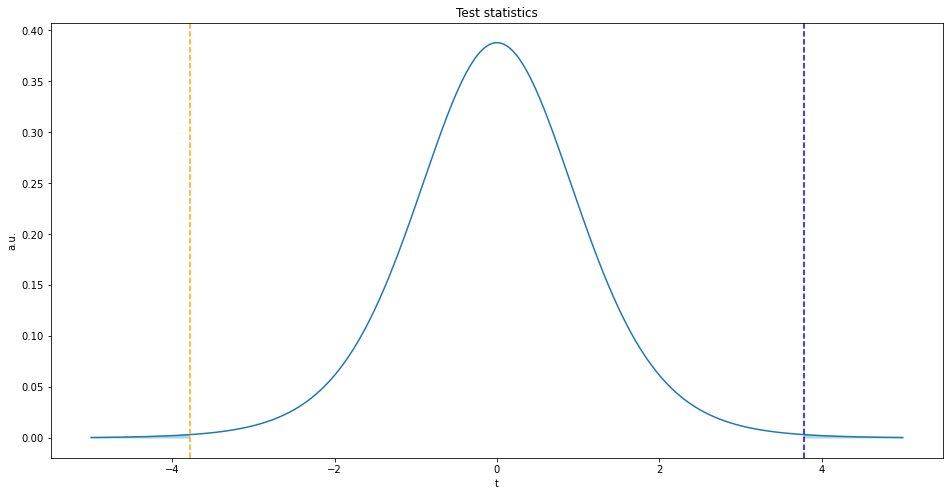


p-value = 0.004302464132864604


In [4]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

numberOfIndividuals = 10
if len(pre) != numberOfIndividuals or len(post) == numberOfIndividuals:
    print("Number of samples that are taken from the individuals are not overlapping with the expectation!\n")

#In order to calculate T-value lets calculate the standar deviation first
#Since the observational values are not depend on each other
#While calculating the variance provide unbiased estimator by setting the ddof=1
standardDeviationOne = np.sqrt(np.var(pre,ddof=1))
standardDeviationTwo = np.sqrt(np.var(post,ddof=1))
standardDeviation = np.sqrt(((standardDeviationOne ** 2) + (standardDeviationTwo ** 2))/2)


#Calculating the T value
meanPre = np.mean(pre)
meanPost = np.mean(post)
TValue = (meanPre - meanPost) / (standardDeviation * np.sqrt(2/numberOfIndividuals))

print("Obtained T-value :", TValue,"\n")
# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, numberOfIndividuals - 1)
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(TValue), color='lightblue')
plt.axvline(TValue, linestyle='--', color='orange')
plt.axvline(-TValue, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(TValue, numberOfIndividuals - 1) + (1. - stats.t.cdf(-TValue, numberOfIndividuals - 1))
print("\np-value =", pvalue)

#P-value is less than 0.05(which is significance value).
#Null hyphotesis was change in the blood pressure is not significant
#However, we are rejecting the null hyphothesis
#Hence, change in the blood pressure is significant


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Samples for both min and max Temperature values are equal, there are:  12 samples



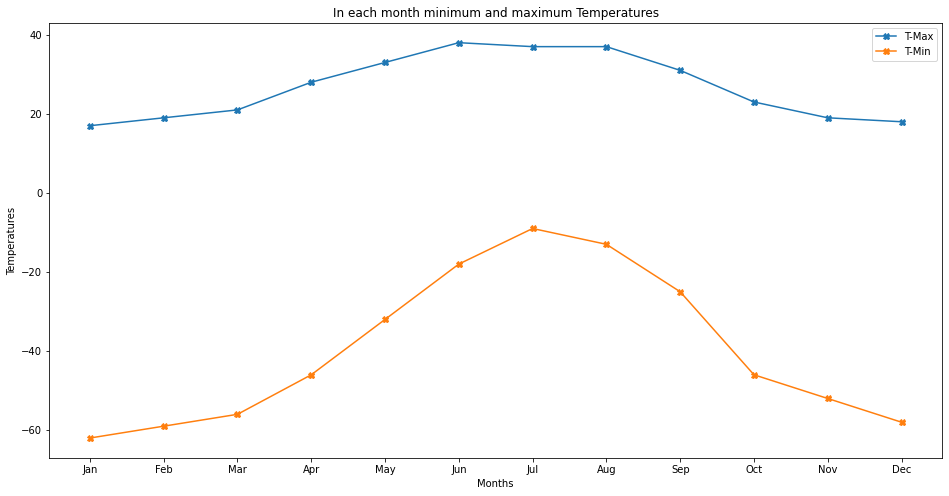

In [5]:
minTemperatures = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
maxTemperatures = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
Months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
numberOfMinTemperatureSamples = len(minTemperatures)
numberOfMaxTemperatureSamples = len(maxTemperatures)

samplesAreEqualSize = False
if numberOfMinTemperatureSamples == numberOfMaxTemperatureSamples:
    samplesAreEqualSize = True
    print("Samples for both min and max Temperature values are equal, there are: ",numberOfMinTemperatureSamples,"samples\n")

fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(Months,maxTemperatures, label = "T-Max",marker='X')
plt.plot(Months,minTemperatures, label = "T-Min",marker='X')
plt.ylabel("Temperatures")
plt.xlabel("Months")
plt.title("In each month minimum and maximum Temperatures")
plt.legend()
plt.show()

In [6]:
#It seems that even with the original data we are close to the bell-curve (can be Gaussian Distrubtion)
#Hence,lets define Gaussian Function

maxMAXTemperatureSample = max(maxTemperatures)
minMAXTemperatureSamples = min(maxTemperatures)
maxMINTemperatureSamples = max(minTemperatures)
minMINTemperatureSamples = min(minTemperatures)

meanMaxTemperatureSamples = sum(np.arange(numberOfMaxTemperatureSamples) * maxTemperatures) / sum(maxTemperatures)
meanMinTemperatureSamples = sum(np.arange(numberOfMinTemperatureSamples) * minTemperatures) / sum(minTemperatures)

standardDeviationMaxSamples = np.sqrt(sum(maxTemperatures * (np.arange(numberOfMaxTemperatureSamples) - meanMaxTemperatureSamples)**2) / sum(maxTemperatures))
standardDeviationMinSamples = np.sqrt(sum(minTemperatures * (np.arange(numberOfMinTemperatureSamples) - meanMinTemperatureSamples)**2) / sum(minTemperatures))

def GaussianFunction(sample, scaleFactor, Mean, StandarDeviation,H):
    return scaleFactor * np.exp( -(sample - Mean)**2 / (2 * StandarDeviation**2)) + H

parametersMax,covarianceMax = optimize.curve_fit(GaussianFunction, np.arange(numberOfMaxTemperatureSamples), maxTemperatures, p0 = [maxMAXTemperatureSample, meanMaxTemperatureSamples, standardDeviationMaxSamples, 0])
parametersMin, covarianceMin = optimize.curve_fit(GaussianFunction, np.arange(numberOfMinTemperatureSamples), minTemperatures, p0 = [maxMINTemperatureSamples, meanMinTemperatureSamples, standardDeviationMinSamples, 0])

print("Parameters Matrix MAX: ", parametersMax, "\n")
print("Covariance Matrix MAX:\n", covarianceMax, "\n")

print("Parameters Matrix MIN: ", parametersMin, "\n")
print("Covariance Matrix MIN:\n", covarianceMin,"\n")

Parameters Matrix MAX:  [23.09207141  5.73581557  2.29443164 15.77934501] 

Covariance Matrix MAX:
 [[ 1.32867535e+00 -1.60423832e-03  1.01480460e-01 -1.08340989e+00]
 [-1.60423832e-03  6.31514259e-03 -2.12233078e-04  1.91648216e-03]
 [ 1.01480460e-01 -2.12233078e-04  2.75441452e-02 -1.70935422e-01]
 [-1.08340989e+00  1.91648216e-03 -1.70935422e-01  1.38433748e+00]] 

Parameters Matrix MIN:  [ 52.6492924    6.16452594   1.97590022 -61.32093743] 

Covariance Matrix MIN:
 [[ 1.96936391e+00 -8.73506553e-04  2.27187841e-02 -1.05130553e+00]
 [-8.73506553e-04  2.22850049e-03 -4.92555432e-05  1.09102094e-03]
 [ 2.27187841e-02 -4.92555432e-05  5.77327914e-03 -7.06520989e-02]
 [-1.05130553e+00  1.09102094e-03 -7.06520989e-02  1.41330970e+00]] 



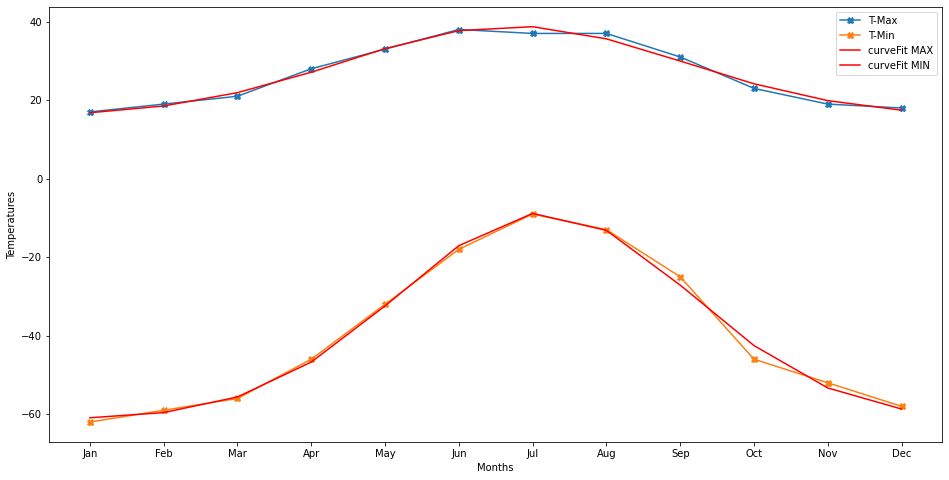

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(Months, maxTemperatures, marker="X", label = "T-Max")
plt.plot(Months, minTemperatures,marker="X", label = "T-Min")
plt.plot(Months, GaussianFunction(np.linspace(0, numberOfMaxTemperatureSamples-1, numberOfMaxTemperatureSamples), *parametersMax), color = "red", label = "curveFit MAX")
plt.plot(Months, GaussianFunction(np.linspace(0, numberOfMinTemperatureSamples-1, numberOfMinTemperatureSamples), *parametersMin), color = "red", label = "curveFit MIN")
plt.ylabel("Temperatures")
plt.xlabel("Months")
plt.legend()
plt.show()

#Parameters are resonable. When we look at the plot we achieved a good fit
#As an observation timeshits are different in MIN and MAX Temperature samples.

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [8]:
#Reading the residuals_261.pkl file
pickleObject = pd.read_pickle('data/residuals_261.pkl')

#Transform the pickle object into python dictionary
PickleDictionary = dict(pickleObject.item())

#Convert the dictionary into dataframe
ResidualDataframe = pd.DataFrame(PickleDictionary)
ResidualDataframe

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


Bins can be obtianed as:  106 



Text(0, 0.5, 'Number of samples')

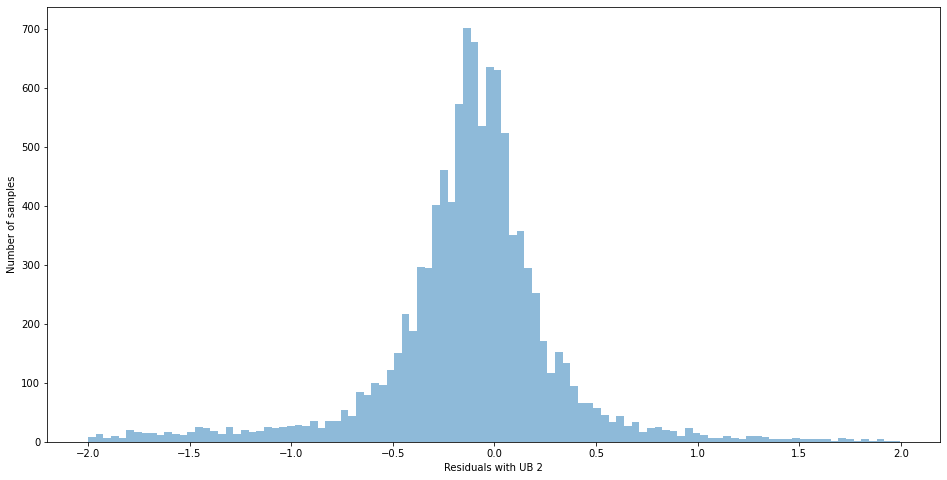

In [9]:
#Considering only the "residual" feature
#Creation of the histogram with appropiate binning and plotting

#As an automatic response matplotlib defines it bin as 10
#But in general cases bins are calculated as the square root of the samples
#Lets calculate the bins as square root of smaples
binsSquareRoot = round(np.sqrt(len(ResidualDataframe["residuals"])))
print("Bins can be obtianed as: ",binsSquareRoot,"\n")

residualsRange = [2,3,4]
residualsDataframeTwo = ResidualDataframe.loc[abs(ResidualDataframe["residuals"]) < residualsRange[0]]
residualsFeaturesTwo = residualsDataframeTwo["residuals"]
fig, ax = plt.subplots(figsize=(16, 8))
y, bins, _ = plt.hist(residualsFeaturesTwo, bins = binsSquareRoot, alpha = 0.5, label = 'Residuals')
plt.xlabel("Residuals with UB 2")
plt.ylabel("Number of samples")


#Histogram seems too general and not showing an appropiate histogram
#In order for a better histogram visualization lets define upper bound for residuals with different values
#Upper bound is chosen as 2 from the observations
#Data from the residuals are restricted by the value of 2

In [ ]:

"""
residualsDataframeThree = ResidualDataframe.loc[abs(ResidualDataframe["residuals"]) < residualsRange[1]]
residualsDataframeFour = ResidualDataframe.loc[abs(ResidualDataframe["residuals"]) < residualsRange[2]]

residualsFeatures = ResidualDataframe["residuals"]
residualsFeaturesThree = residualsDataframeThree["residuals"]
residualsFeaturesFour = residualsDataframeFour["residuals"]

y, bins, _ = plt.hist(residualsFeatures, bins = binsSquareRoot, alpha = 0.5, label = 'Residuals')
plt.xlabel("Residuals")
plt.ylabel("Number of samples")

y, bins, _ = plt.hist(residualsFeaturesThree, bins = binsSquareRoot, alpha = 0.5, label = 'Residuals')
plt.xlabel("Residuals with UB 3")
plt.ylabel("Number of samples")

y, bins, _ = plt.hist(residualsFeaturesFour, bins = binsSquareRoot, alpha = 0.5, label = 'Residuals')
plt.xlabel("Residuals with UB 4")
plt.ylabel("Number of samples")

"""

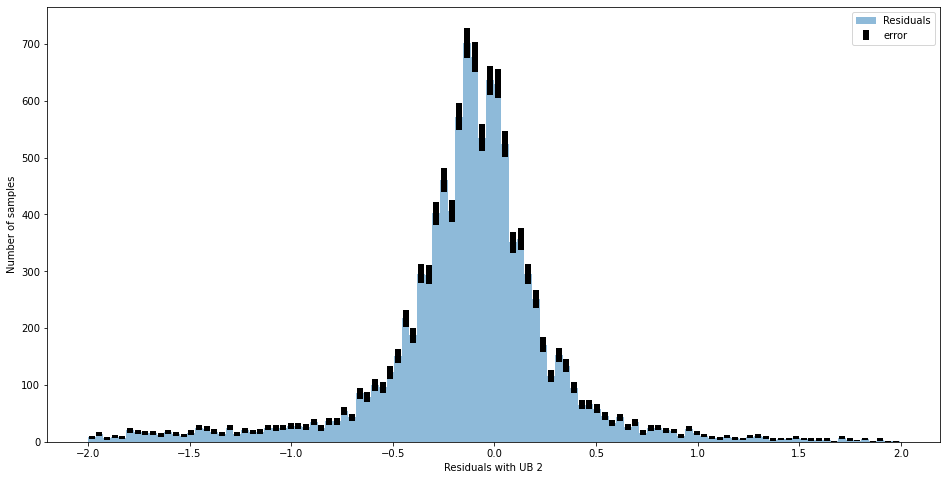

In [10]:
#Application of the poisson uncertanity to each bin denoted as std[i] = sqrt(numberofentries[i]
#Hence,lets define the uncertainity
#Returns the uncertainity for each bin
poissionUncertanity = np.sqrt(np.abs(y))
#Finding the bin centers
#Returns the each bin center
binCenters = (bins[:-1] + bins[1:]) / 2

residualsRange = [2,3,4]
residualsDataframeTwo = ResidualDataframe.loc[abs(ResidualDataframe["residuals"]) < residualsRange[0]]
residualsFeaturesTwo = residualsDataframeTwo["residuals"]
fig, ax = plt.subplots(figsize=(16, 8))
y, bins, _ = plt.hist(residualsFeaturesTwo, bins = binsSquareRoot, alpha = 0.5, label = 'Residuals')
plt.errorbar(x = binCenters, y = y, yerr = poissionUncertanity, elinewidth = 6, color = "black", linestyle = "None", label = "error")
plt.xlabel("Residuals with UB 2")
plt.ylabel("Number of samples")
plt.legend()
plt.show()

Gaussian Parameters:  [ 6.00019973e+02 -8.70451225e-02  2.12577869e-01  1.88791263e+01] 

Gaussian Covariance Matrix:  [[ 1.24968265e+02 -3.24430595e-10 -2.45542443e-02 -7.42851164e+00]
 [-3.24430595e-10  2.00361921e-05  1.07645750e-13 -3.39014333e-11]
 [-2.45542443e-02  1.07645750e-13  2.26735731e-05 -5.26374533e-03]
 [-7.42851164e+00 -3.39014333e-11 -5.26374533e-03  1.05055030e+01]] 



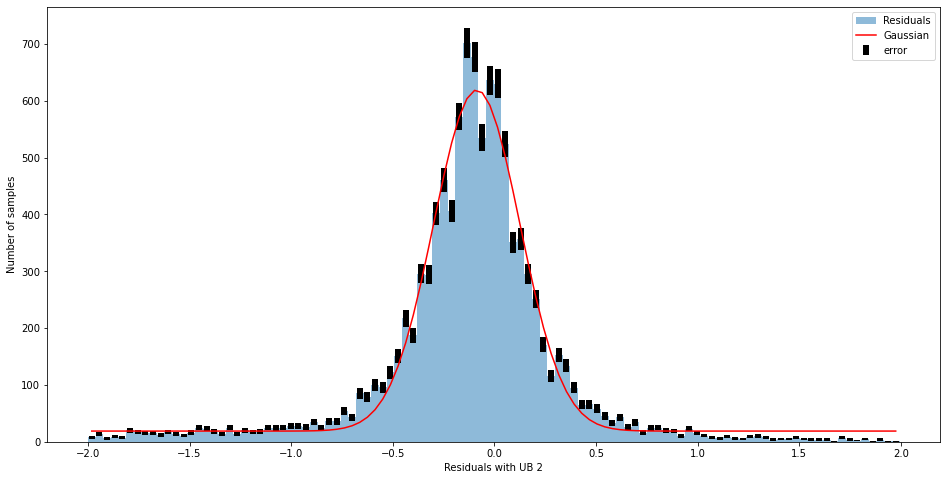

In [11]:
#By looking at the distribution of the residuals, Gaussion distribution function seems to be the best applicable one
def GaussianFunction(sample, scaleFactor, Mean, StandarDeviation,H):
    return scaleFactor * np.exp( -(sample - Mean)**2 / (2 * StandarDeviation**2)) + H

#Finding the curve
mean, standarDeviation = stats.norm.fit(y)
parametersGauss, covarianceMatrixGauss = optimize.curve_fit(GaussianFunction, binCenters, y)
print("Gaussian Parameters: ", parametersGauss,"\n")
print("Gaussian Covariance Matrix: ", covarianceMatrixGauss,"\n")
alteredYvalues = GaussianFunction(binCenters, *parametersGauss)
#Shaping the dataframe for histogram
residualsRange = [2,3,4]
residualsDataframeTwo = ResidualDataframe.loc[abs(ResidualDataframe["residuals"]) < residualsRange[0]]
residualsFeaturesTwo = residualsDataframeTwo["residuals"]

fig, ax = plt.subplots(figsize=(16, 8))
y, bins, _ = plt.hist(residualsFeaturesTwo, bins = binsSquareRoot, alpha = 0.5, label = 'Residuals')
plt.errorbar(x = binCenters, y = y, yerr = poissionUncertanity, elinewidth = 6, color = "black", linestyle = "None", label = "error")
plt.plot(binCenters, alteredYvalues, "red", label = "Gaussian")
plt.xlabel("Residuals with UB 2")
plt.ylabel("Number of samples")
plt.legend()
plt.show()

In [12]:
#Performing a goodnes-of-fit test

gaussianFit = GaussianFunction(binCenters ,*tuple(parametersGauss))
#Setting the number of degrees fo freedom
numbeOfDegreesOfFreedom = len(binCenters) - 1
print("Number of degrees of freedom:", numbeOfDegreesOfFreedom,"\n")

# calculate the chi^2
chi2 = np.sum(((y - gaussianFit)**2) / numbeOfDegreesOfFreedom)
probabilityP = 1. - stats.chi2.cdf(chi2, numbeOfDegreesOfFreedom)

print("chi2 :", chi2,"\n")
print("p value :", probabilityP,"\n")

#Probability is zero or really close to zero which is less than 0.05
#Hence the fit is not satisfactory

Number of degrees of freedom: 105 

chi2 : 775.5197009049426 

p value : 0.0 



5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [13]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

In [14]:
#Loading the data into dataframe
MunichTemperatures = np.loadtxt("data/munich_temperatures_average_with_bad_data.txt")
#Since the first column the every day in a year and the second column gives the temperature
#We will define the first column as year-day and second column as Temperature
MunichTemperaturesDataframe = pd.DataFrame(MunichTemperatures,columns=["Year-Day","Temperature"])

MunichTemperaturesDataframe

,Year-Day,Temperature
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


In [21]:
#Since the file is denoted ad bad data, we can observe that there are some meaningless data within the dataframe
#But since the question do not ask to manipulate and correct the data for now we will keep it that way

#Creating the function in order to fit the data
def functionF(t,a,b,c):
    return a * np.cos(2 * np.pi * t + b) + c

In [22]:
#Sieve the data for taking the years between 2008 and 2012
#Sieve the years bigger and equal to 2008
SievedBiggerMunichTemperaturesDataframe = MunichTemperaturesDataframe[(MunichTemperaturesDataframe['Year-Day'] >= 2008)]
SievedLessMunichTemperaturesDataframe = SievedBiggerMunichTemperaturesDataframe[(SievedBiggerMunichTemperaturesDataframe['Year-Day']<= 2012)]
SievedLessMunichTemperaturesDataframe

,Year-Day,Temperature
4748,2008.00274,-2.94444
4749,2008.00548,-2.66667
4750,2008.00821,-2.66667
4751,2008.01095,-2.00000
4752,2008.01369,-1.94444
...,...,...
6204,2011.98836,3.44444
6205,2011.99110,1.27778
6206,2011.99384,2.88889
6207,2011.99658,1.83333


Text(0, 0.5, 'Temperatures')

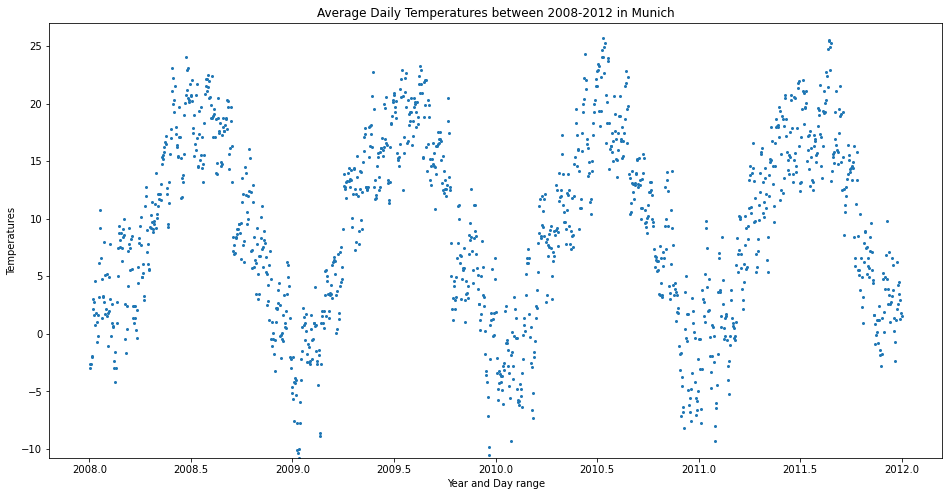

In [23]:
#Make a plot of the data
#It seems that the data have some high temperatures too, that is why for the obersvation we limitize the upper limit to 30
#Limit the y-range with the minimum temperature and 27 since we have only two points at 90
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(SievedLessMunichTemperaturesDataframe["Year-Day"], SievedLessMunichTemperaturesDataframe["Temperature"], marker="o",markersize=2,linestyle="None")
plt.ylim((min(SievedLessMunichTemperaturesDataframe['Temperature']), 27))
plt.title("Average Daily Temperatures between 2008-2012 in Munich")
plt.xlabel("Year and Day range")
plt.ylabel("Temperatures")



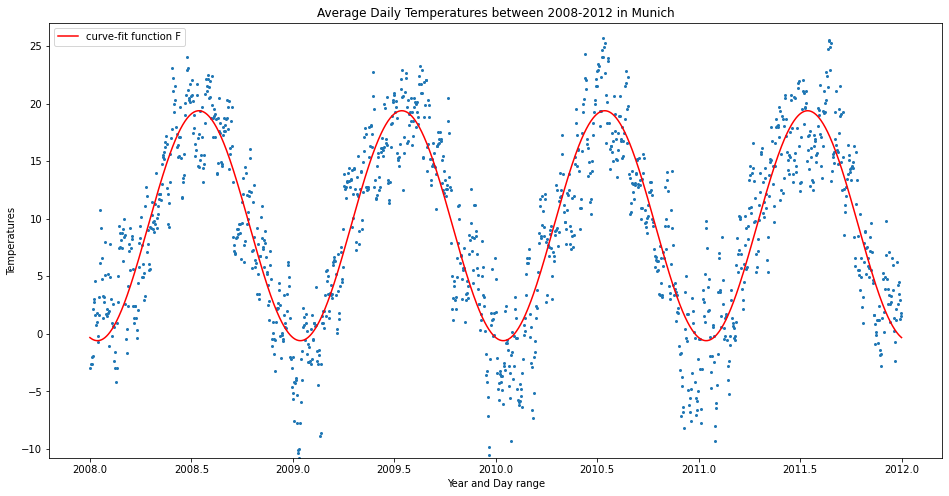

In [24]:
#Fitting the curve over the data according to the function defined
parametersF, covarianceMatrixF = optimize.curve_fit(functionF, SievedLessMunichTemperaturesDataframe["Year-Day"], SievedLessMunichTemperaturesDataframe["Temperature"], p0 = [1, 1, np.mean(SievedLessMunichTemperaturesDataframe["Temperature"])])
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(SievedLessMunichTemperaturesDataframe["Year-Day"], SievedLessMunichTemperaturesDataframe["Temperature"], marker="o",markersize=2,linestyle="None")
plt.title("Average Daily Temperatures between 2008-2012 in Munich")
plt.xlabel("Year and Day range")
plt.ylabel("Temperatures")
#Limit the y-range with the minimum temperature and 27 since we have only two points at 90
plt.ylim((min(SievedLessMunichTemperaturesDataframe['Temperature']), 27))

#Plotting the curve too this time
xValues = np.linspace(2008, 2012, len(SievedLessMunichTemperaturesDataframe["Temperature"]))
yValues = functionF(xValues, *parametersF)
plt.plot(xValues, yValues, color = "red", label = "curve-fit function F")
plt.legend()
plt.show()

In [25]:
#Best-fit values of the parameters
print("Parameters of the best fit:", parametersF,"\n")
print("Covariance matrix of the best-fit: \n",covarianceMatrixF,"\n")

Parameters of the best fit: [-9.98813368  6.04983771  9.38411486] 

Covariance matrix of the best-fit: 
 [[ 3.22599219e-02 -1.58737085e-07 -5.53270480e-08]
 [-1.58737085e-07  3.23393388e-04 -2.22775923e-08]
 [-5.53270480e-08 -2.22775923e-08  1.61303440e-02]] 



In [26]:
#Overall average temperature in Munich
print("Average Temperature in Munich: ", parametersF[2],"\n")
#Typical daily average value predicted by the model for the coldest time of the year
print("Daily average value predicted by the model for the coldest time of the year: ", parametersF[2] - parametersF[0],"\n")
#Typical daily average value predicted by the model for the hottest time of the year
print("Daily average value predicted by the model for the hottest time of the year: ", parametersF[2] + parametersF[0],"\n")

Average Temperature in Munich:  9.384114861203884 

Daily average value predicted by the model for the coldest time of the year:  19.372248546105304 

Daily average value predicted by the model for the hottest time of the year:  -0.6040188236975386 



In [27]:
#Meaning of the b value is timeshift for the time representation
#Normally function think as starting from the point t=0
#However, by the help of b we are defining the starting point accordingly in order to fit the data more properly
#By this mean, in each year instead of starting from t=0, we are shifting the t=starting point in accordance with b

In [28]:
#Now we are defining a new function g
def functionG(t,a,b,c,d):
    return a * np.cos(2 * np.pi * t * b + c) + d    

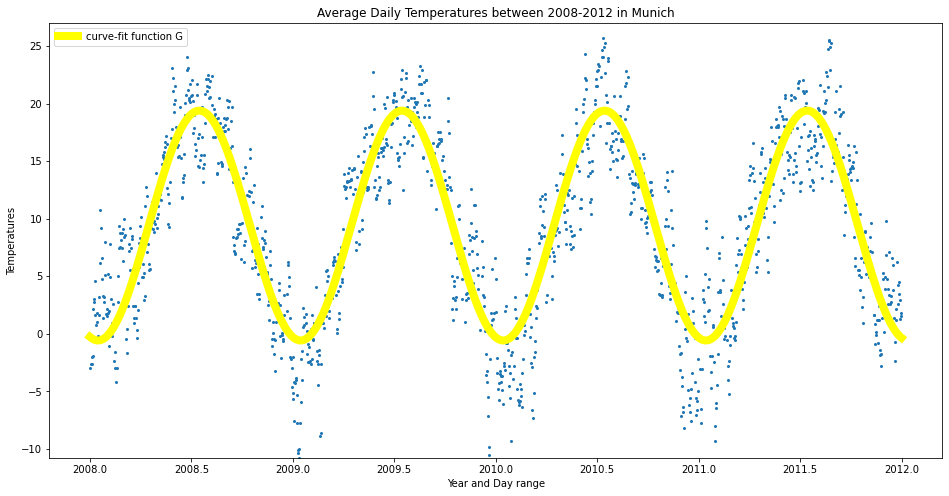

In [29]:
#Fitting the data according to function g
#Fitting the curve over the data according to the function defined
parametersG, covarianceMatrixG = optimize.curve_fit(functionG, SievedLessMunichTemperaturesDataframe["Year-Day"], SievedLessMunichTemperaturesDataframe["Temperature"])
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(SievedLessMunichTemperaturesDataframe["Year-Day"], SievedLessMunichTemperaturesDataframe["Temperature"], marker="o",markersize=2,linestyle="None")
plt.title("Average Daily Temperatures between 2008-2012 in Munich")
plt.xlabel("Year and Day range")
plt.ylabel("Temperatures")
#Limit the y-range with the minimum temperature and 27 since we have only two points at 90
plt.ylim((min(SievedLessMunichTemperaturesDataframe['Temperature']), 27))

#Plotting the curve too this time
xValuesG = np.linspace(2008, 2012, len(SievedLessMunichTemperaturesDataframe["Temperature"]))
yValuesG = functionG(xValuesG, *parametersG)
plt.plot(xValuesG, yValuesG, color = "yellow", label = "curve-fit function G",linewidth=8)
plt.legend()
plt.show()

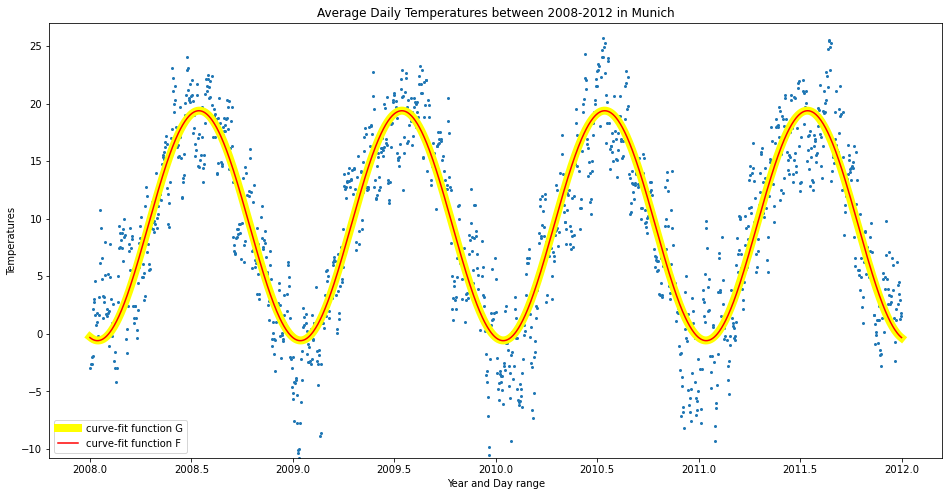

In [30]:
#Analysing the both fits in order to compare whether they are similiar or not

#Fitting the data according to function g
#Fitting the curve over the data according to the function defined
parametersG, covarianceMatrixG = optimize.curve_fit(functionG, SievedLessMunichTemperaturesDataframe["Year-Day"], SievedLessMunichTemperaturesDataframe["Temperature"])
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(SievedLessMunichTemperaturesDataframe["Year-Day"], SievedLessMunichTemperaturesDataframe["Temperature"], marker="o",markersize=2,linestyle="None")
plt.title("Average Daily Temperatures between 2008-2012 in Munich")
plt.xlabel("Year and Day range")
plt.ylabel("Temperatures")
#Limit the y-range with the minimum temperature and 27 since we have only two points at 90
plt.ylim((min(SievedLessMunichTemperaturesDataframe['Temperature']), 27))

#Plotting the curve for Function G
xValuesG = np.linspace(2008, 2012, len(SievedLessMunichTemperaturesDataframe["Temperature"]))
yValuesG = functionG(xValuesG, *parametersG)
plt.plot(xValues, yValuesG, color = "yellow", label = "curve-fit function G",linewidth=8)


#Plotting the curve for Function F
xValues = np.linspace(2008, 2012, len(SievedLessMunichTemperaturesDataframe["Temperature"]))
yValues = functionF(xValues, *parametersF)
plt.plot(xValues, yValues, color = "red", label = "curve-fit function F")

plt.legend()
plt.show()

#As an observation both functions are giving the same fit

In [31]:
#What are the RSS for function f(x) and g(x)
#A residual Sum of Squares(RSS) also known as Sum of Squared of Residuals(SSR)

SSRFunctionF = np.sum((yValues - SievedLessMunichTemperaturesDataframe["Temperature"]) ** 2)
SSRFunctionG = np.sum((yValuesG - SievedLessMunichTemperaturesDataframe["Temperature"]) ** 2)

print("SSR(or RSS) of the function f(x):",SSRFunctionF,"\n")
print("SSR(or RSS) of the function g(x):",SSRFunctionG,"\n")
#Since we have obtained the SSRs(or RSSs) we can apply the Fisher F-test

SSR(or RSS) of the function f(x): 34343.64193735737 

SSR(or RSS) of the function g(x): 34344.17138375058 



In [32]:
# define a function that performes the F-test
def Ftest(SSRFunctionF, SSRFunctionG, degreesOfFreedomF, degreesOfFreedomG, numberOfBins, verbose=False):
    F = ((SSRFunctionF - SSRFunctionG)/(degreesOfFreedomG - degreesOfFreedomF)) / (SSRFunctionG/(numberOfBins - degreesOfFreedomG))
    pval = 1. - stats.f.cdf(F, degreesOfFreedomG - degreesOfFreedomF, numberOfBins - degreesOfFreedomG)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < 0.1 else "NO")
    return pval
print("Test Function F vs Function G:")
pvalFvsG = Ftest(SSRFunctionF, SSRFunctionG, 2, 3, len(SievedLessMunichTemperaturesDataframe["Temperature"]), verbose=True)

#There is no nedd for an additional parameter

Test Function F vs Function G:
p-value: 1.000 , additional parameter necessary: NO
